<a href="https://colab.research.google.com/github/Bhoomish-Patel/Image-Based-Sudoku-Solver/blob/main/Vehicle_Routing_Problem_using_genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import random
import itertools
import matplotlib.pyplot as plt
import math
import numpy as np
from deap import base, creator, tools, algorithms
num_locations = 20
locations=random.sample(tuple(itertools.product(range(26), repeat = 2)),num_locations)
depot=[random.randint(0,26),random.randint(0,26)]
num_vehicles = 3
print(locations)
print(depot)

[(5, 8), (17, 23), (25, 11), (11, 7), (8, 11), (15, 22), (25, 16), (22, 12), (8, 14), (5, 20), (17, 19), (25, 15), (25, 25), (17, 22), (8, 16), (6, 25), (1, 17), (24, 17), (1, 6), (21, 20)]
[2, 14]


In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [ ]:
def evaluate_distances(individual):
  distance=0
  distances=[]
  for i in range(num_vehicles):
    cur=0
    prev=depot
    for j in range(i,len(individual),num_vehicles):
      cur=cur+np.sqrt((locations[individual[j]][0]-prev[0])**2+(locations[individual[j]][1]-prev[1])**2)
      prev=locations[individual[j]]
    cur=cur+np.sqrt((depot[0]-prev[0])**2+(depot[1]-prev[1])**2)
    distance+=cur
    distances.append(cur)
  variance=np.std(distances)
  return distance,variance

In [ ]:
toolbox.register("evaluate",evaluate_distances)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_path(individual):
  for i in range(num_vehicles):
    path=[depot]
    for j in range(i,len(individual),num_vehicles):
      path.append(locations[individual[j]]);
    path.append(depot)
    x=[p[0] for p in path]
    y=[p[1] for p in path]
    plt.plot(x,y,label=f'Vehicle{i+1}')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Optimal Path')
  plt.grid(True);
  plt.show()

gen	nevals	avg    	min     
0  	300   	162.597	0.503923
1  	213   	154.231	1.04738 
2  	243   	150.227	0.388988
3  	232   	148.188	0.988976
4  	233   	145.737	0.746483
5  	218   	142.708	1.01902 
6  	213   	139.025	0.597519
7  	233   	138.729	0.597519
8  	219   	137.175	0.890848
9  	209   	135.03 	1.31028 
10 	224   	134.975	0.830557
11 	230   	135.316	0.795618
12 	230   	134.717	0.48805 
13 	217   	134.038	0.48805 
14 	231   	134.09 	0.48805 
15 	250   	135.149	0.845641
16 	238   	133.55 	1.02119 
17 	236   	130.024	0.792049
18 	225   	128.264	0.700386
19 	225   	122.372	0.164085
20 	209   	116.269	0.433814
21 	232   	113.386	0.47657 
22 	237   	110.948	1.22868 
23 	217   	111.127	0.948816
24 	227   	108.833	1.28215 
25 	246   	107.685	0.25769 
26 	233   	105.631	0.303916
27 	219   	102.921	0.996744
28 	229   	102.284	1.19975 
29 	223   	100.164	0.918584
30 	238   	99.1742	0.141211
31 	225   	98.2309	0.188366
32 	221   	96.9913	0.671941
33 	243   	95.5312	1.43298 
34 	232   	93.9843	1

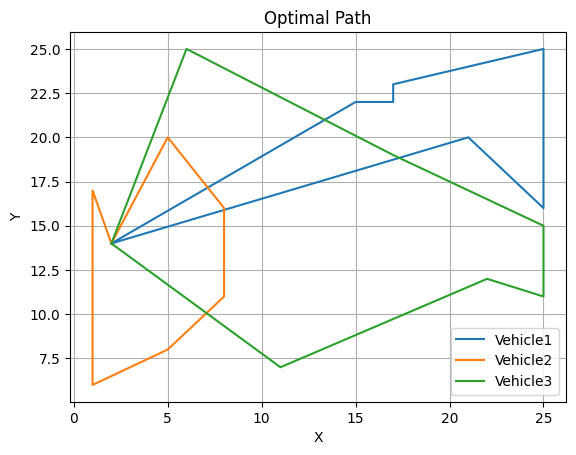

([[5, 9, 3, 13, 14, 7, 19, 8, 2, 17, 4, 11, 6, 0, 10, 12, 18, 15, 1, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 11, 3, 13, 14, 2, 19, 8, 7, 17, 4, 9, 6, 0, 10, 12, 18, 15, 1, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 19, 8, 2, 17, 4, 11, 6, 0, 10, 12, 18, 15, 1, 16],
  [5, 9, 3, 13, 14, 7, 19, 8, 2, 17, 4, 11, 6, 0, 10, 12, 18, 15, 1, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4, 11, 6, 0, 10, 17, 18, 15, 19, 16],
  [5, 9, 3, 13, 14, 7, 19, 8, 2, 17, 4, 11, 6, 0, 10, 12, 18, 15, 1, 16],
  [5, 9, 3, 13, 14, 7, 1, 8, 2, 12, 4,

In [ ]:
def solve_var():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)
    plot_path(hof[0])
    return pop, stats, hof
solve_var()